# SF Crime Data Cleaning Notebook

This notebook provides comprehensive data cleaning for the SF Crime Rate Prediction dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
import os
import pandas as pd

path = os.path.join('data', 'train.csv')  # ✅ Correct relative path

print("Loading the SF Crime dataset...")
try:
    df = pd.read_csv(path)
    print(f"✅ Successfully loaded {len(df):,} records")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")
    raise


Loading the SF Crime dataset...
✅ Successfully loaded 878,049 records


## 1. Basic Data Exploration

In [8]:
print("\n1. BASIC DATA EXPLORATION")
print("-" * 50)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Data info
print("\nData information:")
df.info()

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check column names
print("\nColumn names:")
print(df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check unique values in categorical columns
print("\nNumber of unique values in each column:")
print(df.nunique())


1. BASIC DATA EXPLORATION
--------------------------------------------------
Dataset shape: (878049, 9)

First 5 rows:
                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address       X  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.43   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.43   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.42   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST -122.43   
4  Wednesday       PARK            NONE  100 Block of BRO

In [9]:
print("\n1.1 DUPLICATE DETECTION")
print("-" * 50)
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count} ({duplicate_count/len(df)*100:.2f}%)")

if duplicate_count > 0:
    # Get duplicate rows
    duplicates = df[df.duplicated(keep='first')]
    print("\nSample of duplicate rows:")
    print(duplicates.head())
    
    # Remove duplicates 
    df_unique = df.drop_duplicates(keep='first')
    print(f"\nRemoved {len(df) - len(df_unique)} duplicate rows")
    print(f"Dataset shape after removing duplicates: {df_unique.shape}")
    
    # Reassign to main dataframe
    df = df_unique
    
    # Check for near-duplicates using selected columns (excluding Id)
    if 'Dates' in df.columns and 'Category' in df.columns:
        print("\nChecking for potential 'near-duplicates' (same crime category, date, location)...")
        near_dup_cols = ['Dates', 'Category', 'X', 'Y']
        near_dup_cols = [col for col in near_dup_cols if col in df.columns]
        
        near_duplicates = df.duplicated(subset=near_dup_cols, keep=False)
        near_duplicate_count = near_duplicates.sum()
        print(f"Found {near_duplicate_count} potential near-duplicate records")
        
        if near_duplicate_count > 0 and near_duplicate_count < 1000:
            print("\nSample of near-duplicates (may represent repeated crimes at same location):")
            near_dup_sample = df[near_duplicates].sort_values(by=near_dup_cols).head(10)
            print(near_dup_sample)


1.1 DUPLICATE DETECTION
--------------------------------------------------

Number of duplicate rows: 2323 (0.26%)

Sample of duplicate rows:
                    Dates        Category  \
582   2015-05-12 11:30:00   LARCENY/THEFT   
1133  2015-05-03 23:00:00       VANDALISM   
1822  2015-05-02 02:30:00         ASSAULT   
2109  2015-05-01 11:30:00  OTHER OFFENSES   
3004  2015-04-29 10:00:00       VANDALISM   

                                       Descript  DayOfWeek PdDistrict  \
582                GRAND THEFT FROM LOCKED AUTO    Tuesday   SOUTHERN   
1133  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Sunday    CENTRAL   
1822                                    BATTERY   Saturday       PARK   
2109      DRIVERS LICENSE, SUSPENDED OR REVOKED     Friday   SOUTHERN   
3004              MALICIOUS MISCHIEF, VANDALISM  Wednesday   RICHMOND   

          Resolution                       Address       X     Y  
582             NONE        800 Block of BRYANT ST -122.40 37.78  
1133         

## 2. Missing Value Analysis


2. MISSING VALUE ANALYSIS
--------------------------------------------------

Missing values count for each column:
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

Missing values percentage for each column:
Dates        0.00
Category     0.00
Descript     0.00
DayOfWeek    0.00
PdDistrict   0.00
Resolution   0.00
Address      0.00
X            0.00
Y            0.00
dtype: float64


<Figure size 1200x600 with 0 Axes>

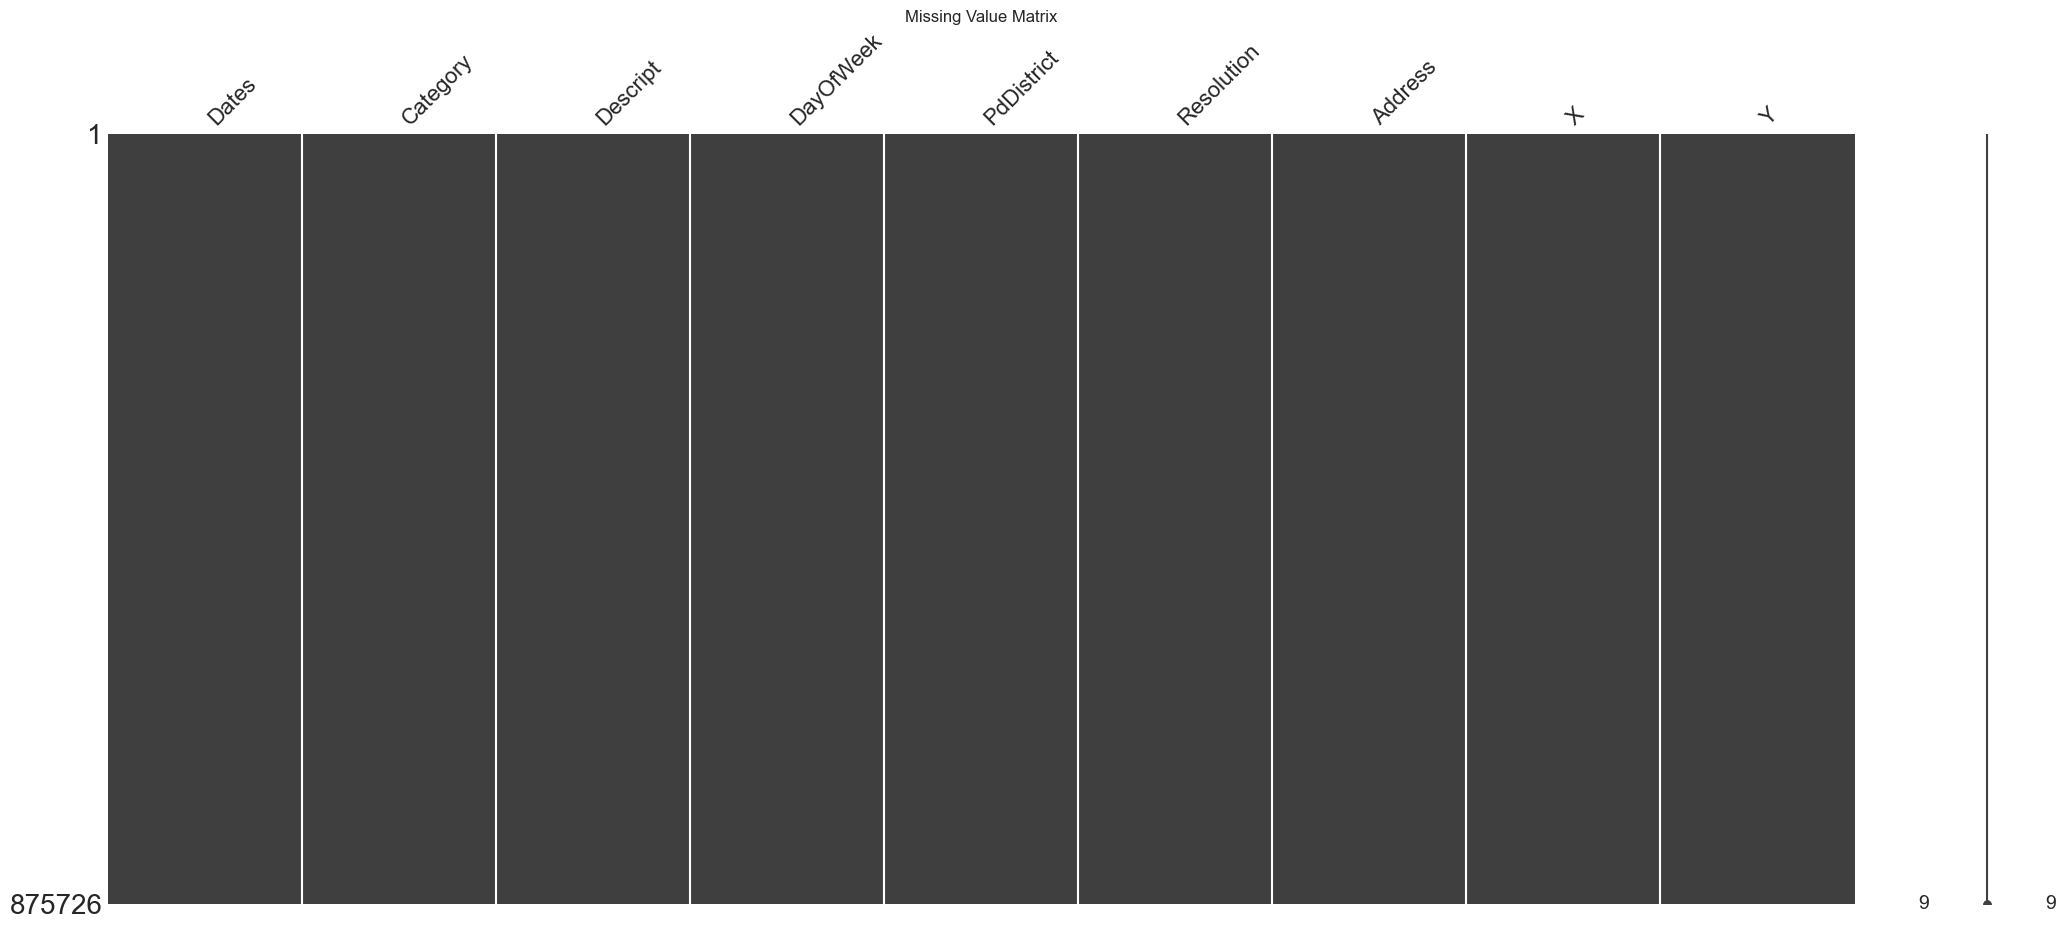

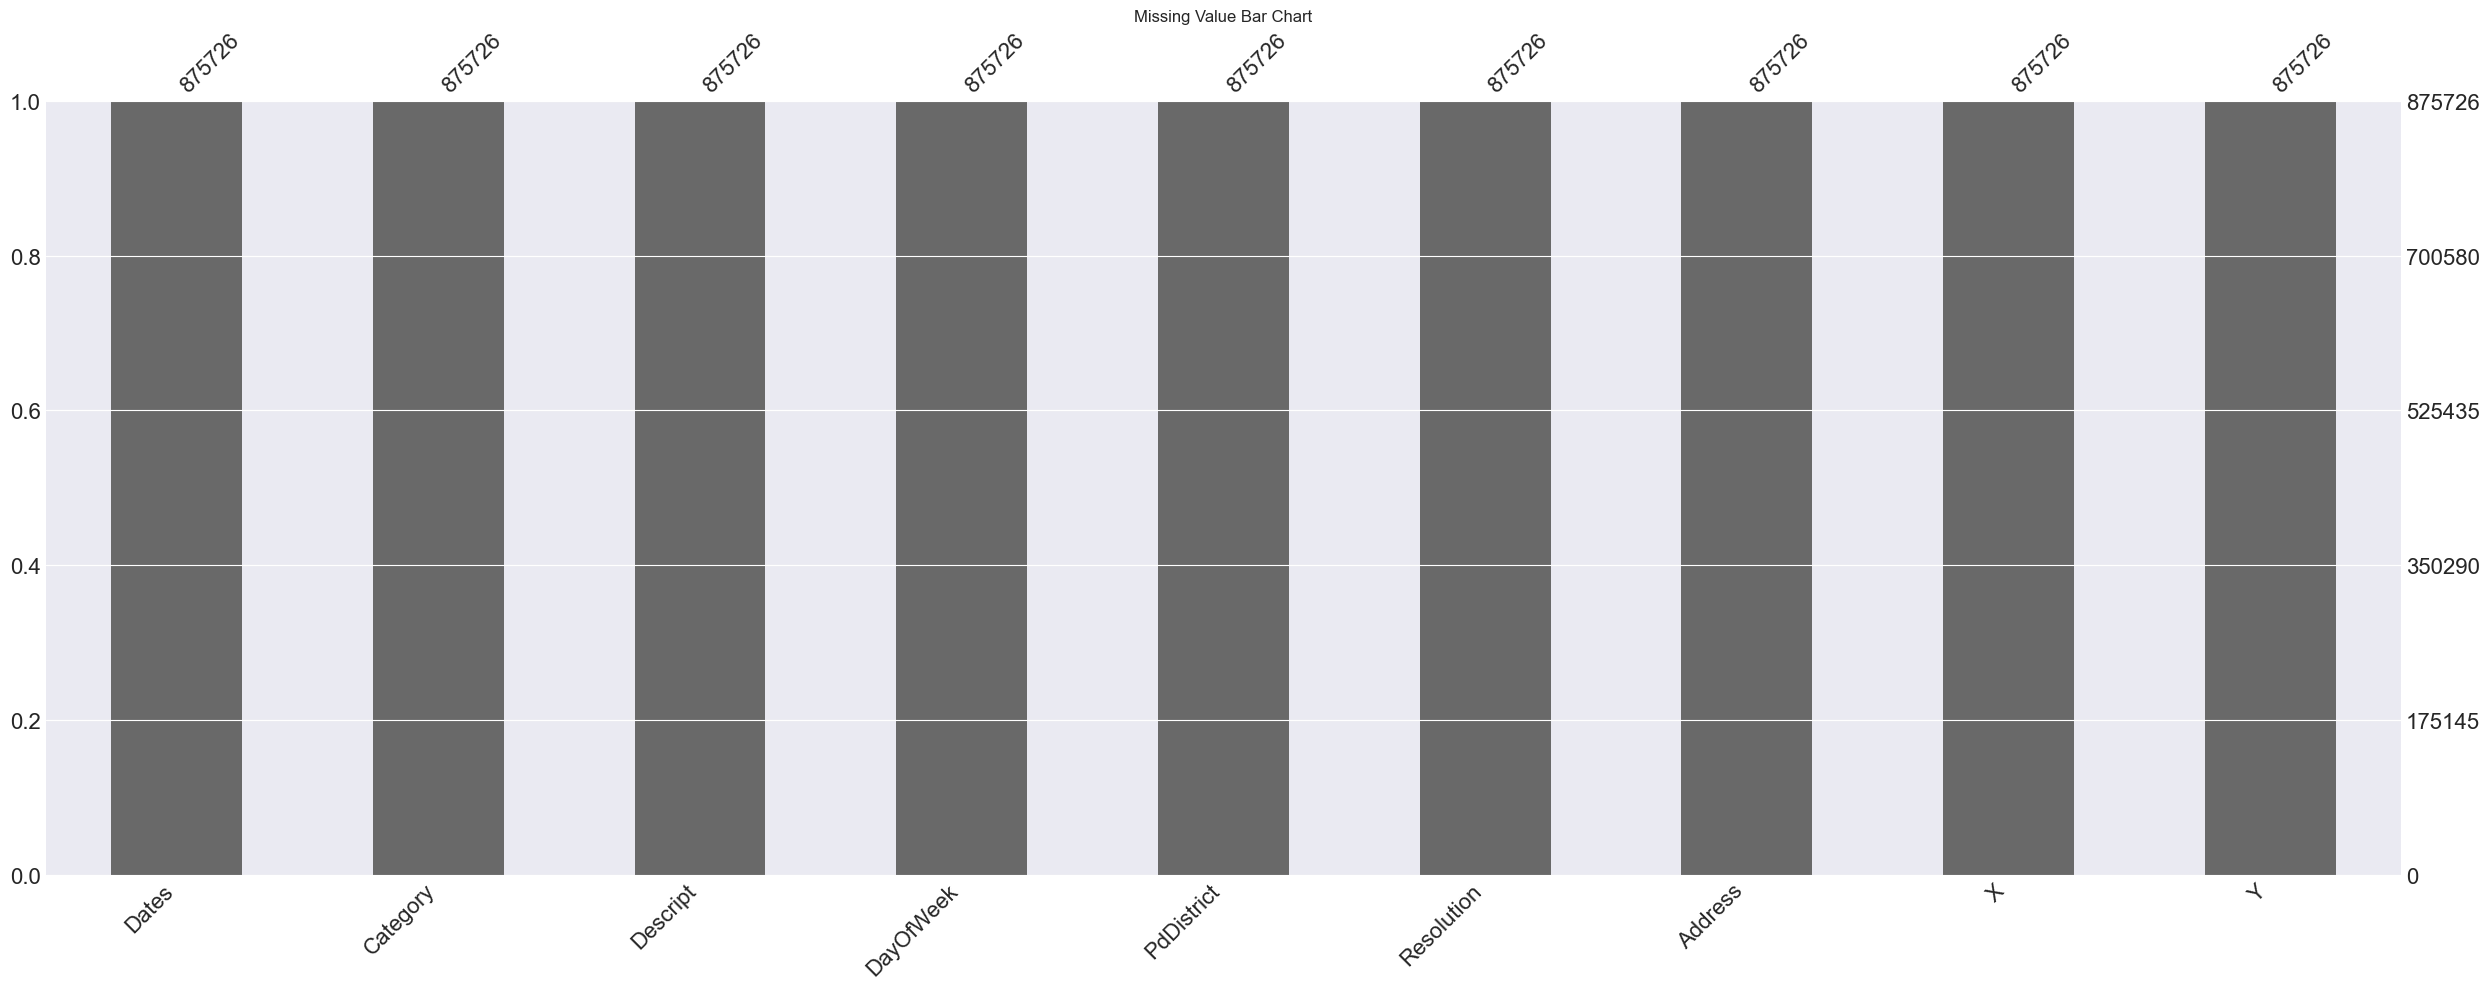

In [11]:
print("\n2. MISSING VALUE ANALYSIS")
print("-" * 50)

path1 = os.path.join("visualization","missing_values_matrix.png")
path2 = os.path.join("visualization","missing_values_bar.png")

# Check for missing values
print("\nMissing values count for each column:")
print(df.isnull().sum())

print("\nMissing values percentage for each column:")
print((df.isnull().sum() / len(df)) * 100)

# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.tight_layout()
plt.savefig(path1)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title('Missing Value Bar Chart')
plt.tight_layout()
plt.savefig(path2)
plt.show()
plt.close()

## 3. Temporal Data Processing


3. TEMPORAL DATA PROCESSING
--------------------------------------------------

Converting date column...
Day of week matches extracted day in 100.00% of cases


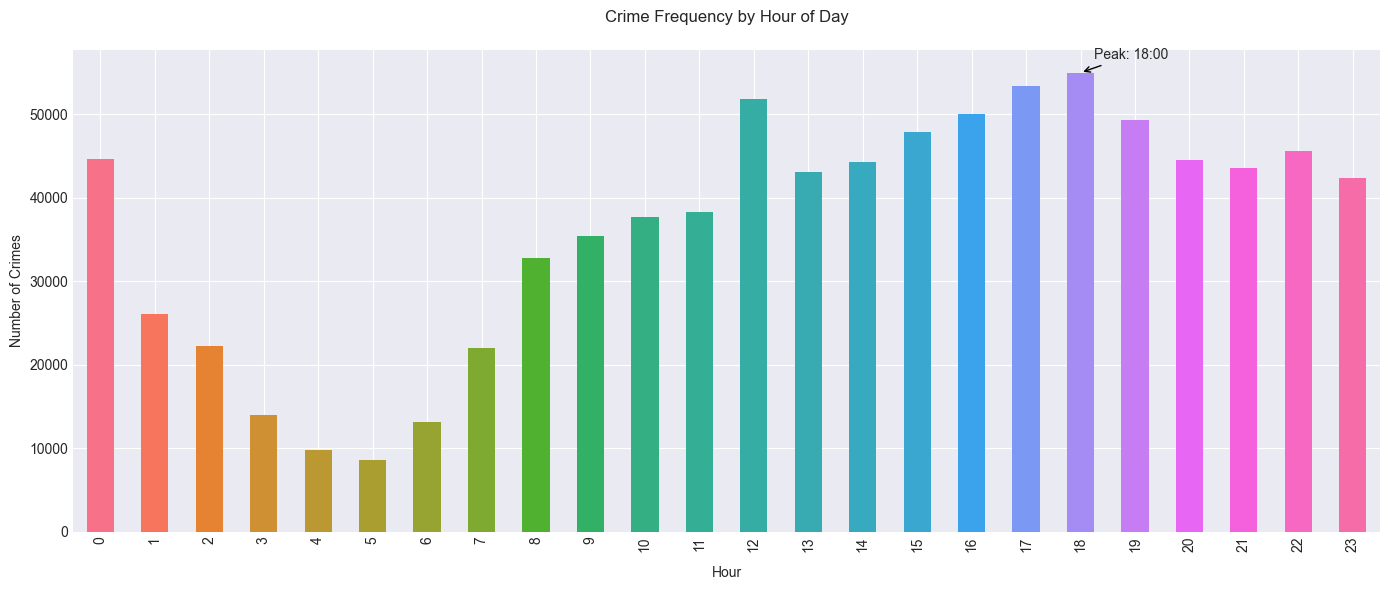

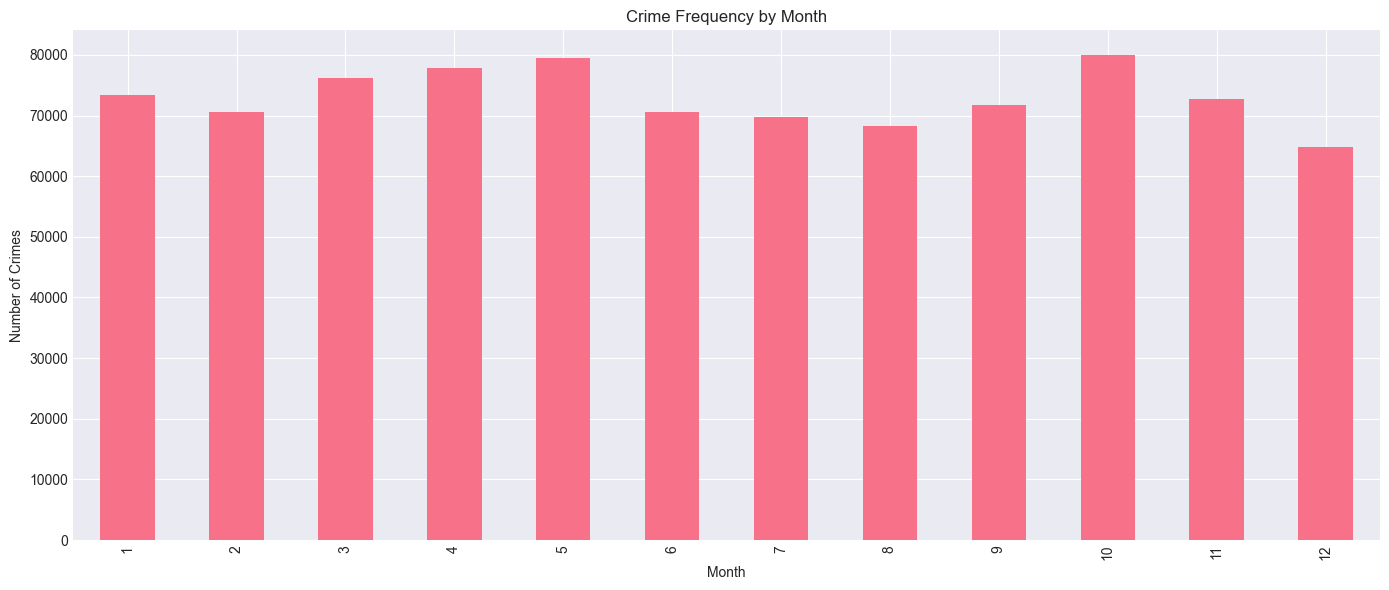

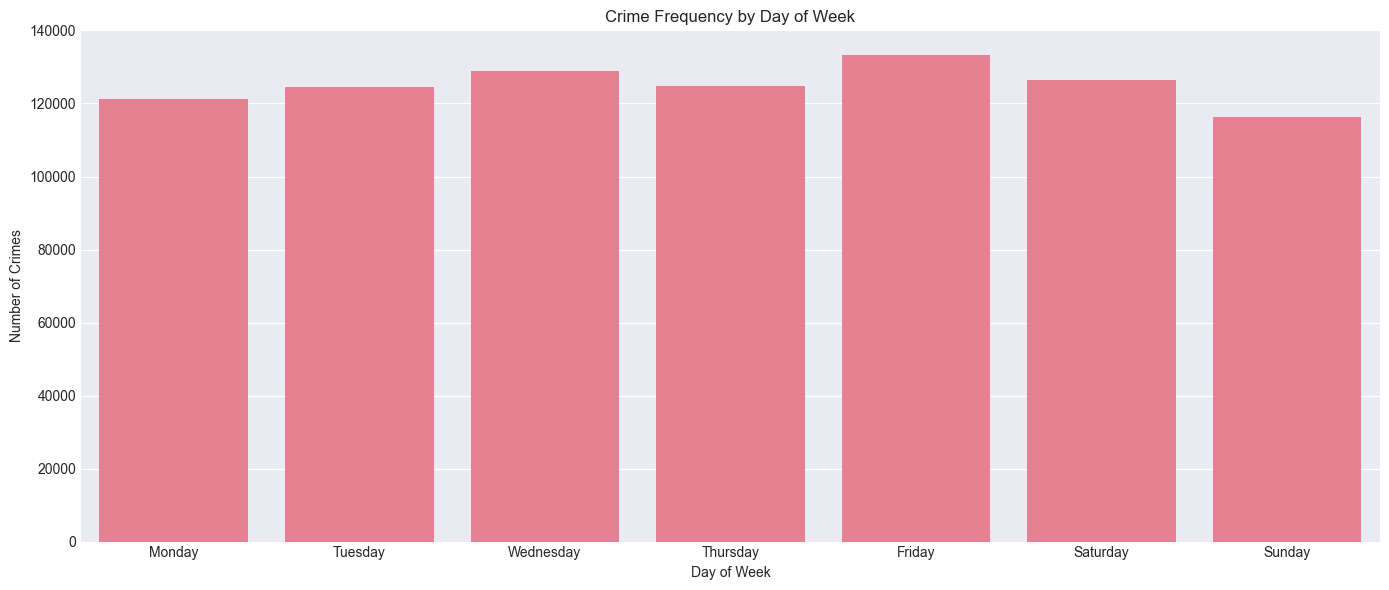

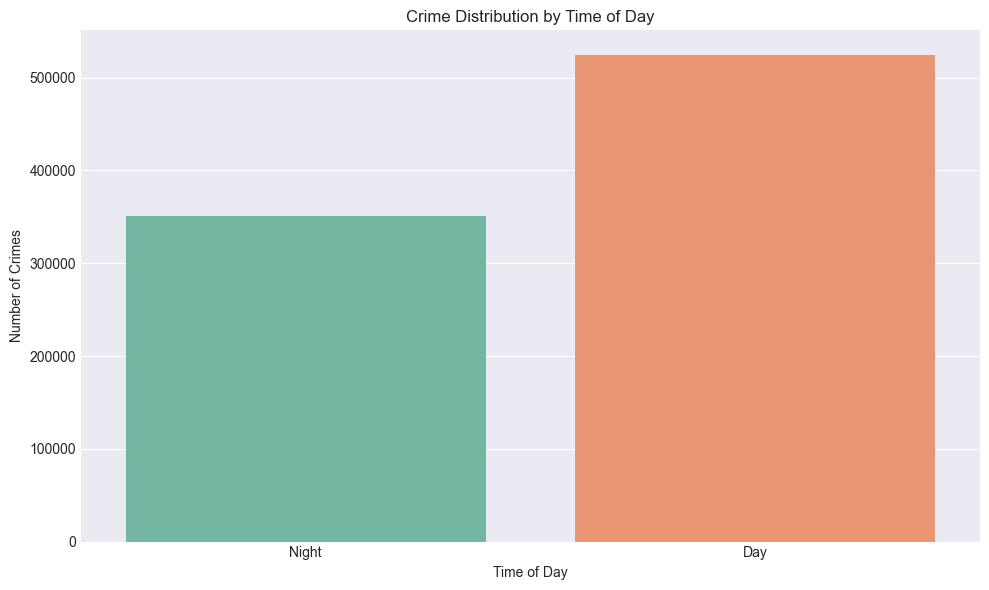

In [12]:
print("\n3. TEMPORAL DATA PROCESSING")
print("-" * 50)


path1 = os.path.join("visualization","crime_by_hour.png")
path2 = os.path.join("visualization","crime_by_month.png")
path3 = os.path.join("visualization","crime_by_day.png")
path4 = os.path.join("visualization","crime_by_time_of_day.png")

# Convert Dates column to datetime format
if 'Dates' in df.columns:
    print("\nConverting date column...")
    df['Dates'] = pd.to_datetime(df['Dates'])

    # Extract date components
    df['Year'] = df['Dates'].dt.year
    df['Month'] = df['Dates'].dt.month
    df['Day'] = df['Dates'].dt.day
    df['Hour'] = df['Dates'].dt.hour
    df['DayOfWeek_Extracted'] = df['Dates'].dt.day_name()

    # Check if the DayOfWeek column matches the extracted day
    if 'DayOfWeek' in df.columns:
        day_match = (df['DayOfWeek'] == df['DayOfWeek_Extracted']).mean() * 100
        print(f"Day of week matches extracted day in {day_match:.2f}% of cases")

    # Add these features after extracting hour/month/day
    df['Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
    df['TimeOfDay'] = np.where(df['Hour'].between(6, 18), 'Day', 'Night')

    # Plot crime counts by hours
    plt.figure(figsize=(14, 6))
    hour_counts = df['Hour'].value_counts().sort_index()
    ax = hour_counts.plot(kind='bar', color=sns.color_palette("husl", 24))
    plt.title('Crime Frequency by Hour of Day', pad=20)
    plt.xlabel('Hour', labelpad=10)
    plt.ylabel('Number of Crimes')

    # Annotate peak hours
    max_hour = hour_counts.idxmax()
    ax.annotate(f'Peak: {max_hour}:00',
                xy=(max_hour, hour_counts.max()),
                xytext=(10, 10), textcoords='offset points',
                arrowprops=dict(arrowstyle='->'))
    plt.tight_layout()
    plt.savefig(path1)
    plt.show()
    plt.close()

    # Plot crime counts by month
    plt.figure(figsize=(14, 6))
    df['Month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Crime Frequency by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.tight_layout()
    plt.savefig(path2)
    plt.show()
    plt.close()

    # Plot crime counts by day of week
    plt.figure(figsize=(14, 6))
    if 'DayOfWeek' in df.columns:
        order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        sns.countplot(data=df, x='DayOfWeek', order=order)
        plt.title('Crime Frequency by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Number of Crimes')
        plt.tight_layout()
        plt.savefig(path3)
        plt.show()
        plt.close()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='TimeOfDay', palette='Set2')
    plt.title('Crime Distribution by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Crimes')
    plt.tight_layout()
    plt.savefig(path4)
    plt.show()
    plt.close()



In [13]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,DayOfWeek_Extracted,Weekend,TimeOfDay
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.43,37.77,2015,5,13,23,Wednesday,False,Night
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.43,37.77,2015,5,13,23,Wednesday,False,Night
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.42,37.80,2015,5,13,23,Wednesday,False,Night
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.43,37.80,2015,5,13,23,Wednesday,False,Night
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.44,37.77,2015,5,13,23,Wednesday,False,Night


In [14]:
df.drop(columns=['Dates'], inplace=True)

In [15]:
df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,DayOfWeek_Extracted,Weekend,TimeOfDay
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.43,37.77,2015,5,13,23,Wednesday,False,Night
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.43,37.77,2015,5,13,23,Wednesday,False,Night
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.42,37.80,2015,5,13,23,Wednesday,False,Night
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.43,37.80,2015,5,13,23,Wednesday,False,Night
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.44,37.77,2015,5,13,23,Wednesday,False,Night


## 4. Categorical Data Analysis


4. CATEGORICAL DATA ANALYSIS
--------------------------------------------------

Categorical columns: ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'DayOfWeek_Extracted', 'TimeOfDay']

Number of unique values in categorical columns:
Category: 39 unique values
Descript: 879 unique values
DayOfWeek: 7 unique values
PdDistrict: 10 unique values
Resolution: 17 unique values
Address: 23228 unique values
DayOfWeek_Extracted: 7 unique values
TimeOfDay: 2 unique values

Top 10 crime categories:
Category
LARCENY/THEFT     174320
OTHER OFFENSES    125960
NON-CRIMINAL       91915
ASSAULT            76815
DRUG/NARCOTIC      53919
VEHICLE THEFT      53706
VANDALISM          44581
WARRANTS           42145
BURGLARY           36600
SUSPICIOUS OCC     31394
Name: count, dtype: int64


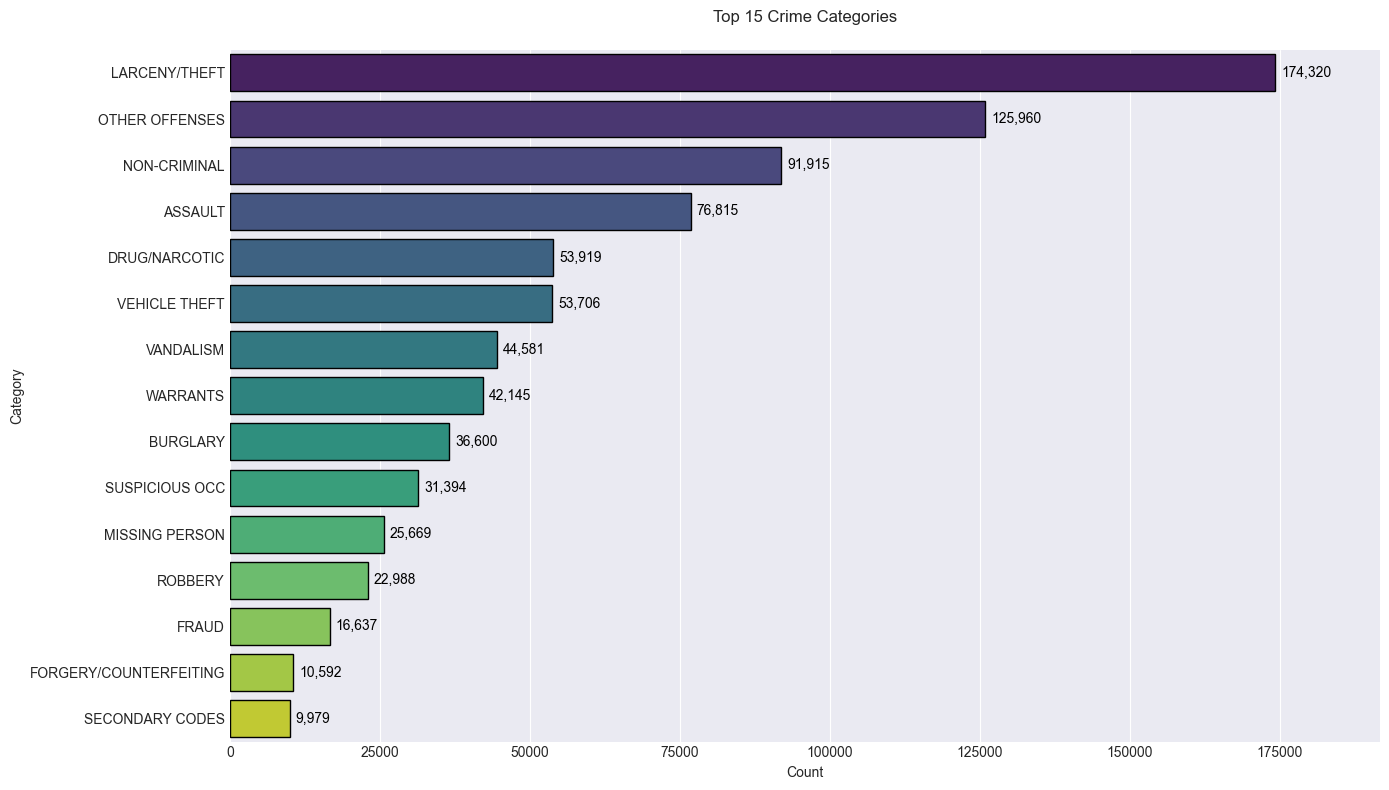


Crime distribution by police district:
PdDistrict
SOUTHERN      156528
MISSION       119723
NORTHERN      105105
BAYVIEW        89098
CENTRAL        85267
TENDERLOIN     81642
INGLESIDE      78722
TARAVAL        65400
PARK           49161
RICHMOND       45080
Name: count, dtype: int64


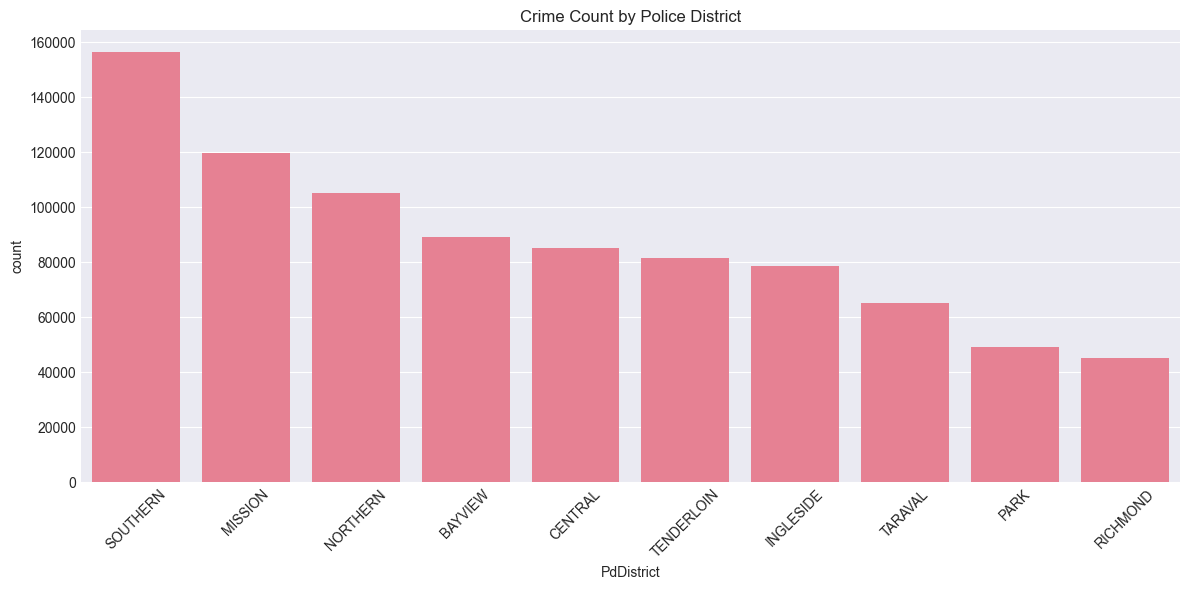

In [16]:
print("\n4. CATEGORICAL DATA ANALYSIS")
print("-" * 50)
path1 = os.path.join("visualization","top_crime_categories.png")
path2 = os.path.join("visualization", "crime_by_district.png")
# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {cat_columns}")

# Check cardinality (number of unique values) in categorical columns
print("\nNumber of unique values in categorical columns:")
for col in cat_columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Analyze most common crime categories
if 'Category' in df.columns:
    print("\nTop 10 crime categories:")
    print(df['Category'].value_counts().head(10))

    # category plot
    plt.figure(figsize=(14, 8))
    top_categories = df['Category'].value_counts().head(15)
    ax = sns.barplot(x=top_categories.values, y=top_categories.index,
                     palette="viridis", edgecolor='black')

    # Add value labels
    for i, v in enumerate(top_categories.values):
        ax.text(v + 1000, i, f"{v:,}", color='black', va='center')


    plt.title('Top 15 Crime Categories', pad=20)
    plt.xlabel('Count')
    plt.xlim(0, top_categories.max() * 1.1)  # Add padding
    plt.tight_layout()
    plt.savefig(path1)
    plt.show()
    plt.close()

# Analyze district distribution
if 'PdDistrict' in df.columns:
    print("\nCrime distribution by police district:")
    print(df['PdDistrict'].value_counts())

    # Plot district distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='PdDistrict', order=df['PdDistrict'].value_counts().index)
    plt.title('Crime Count by Police District')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(path2)
    plt.show()
    plt.close()


In [17]:
# Define San Francisco coordinate bounds at the top (global constants)
SF_LAT_MIN, SF_LAT_MAX = 37.7, 37.82   # Y bounds (latitude)
SF_LON_MIN, SF_LON_MAX = -122.52, -122.37  # X bounds (longitude)

## 5. Spatial Data Analysis


5. SPATIAL DATA ANALYSIS
--------------------------------------------------

Checking for coordinate outliers...

Coordinate statistics:
              X         Y
count 875726.00 875726.00
mean    -122.42     37.77
std        0.03      0.46
min     -122.51     37.71
25%     -122.43     37.75
50%     -122.42     37.78
75%     -122.41     37.78
max     -120.50     90.00
X coordinate outliers: 60126 (6.87%)
Y coordinate outliers: 67 (0.01%)


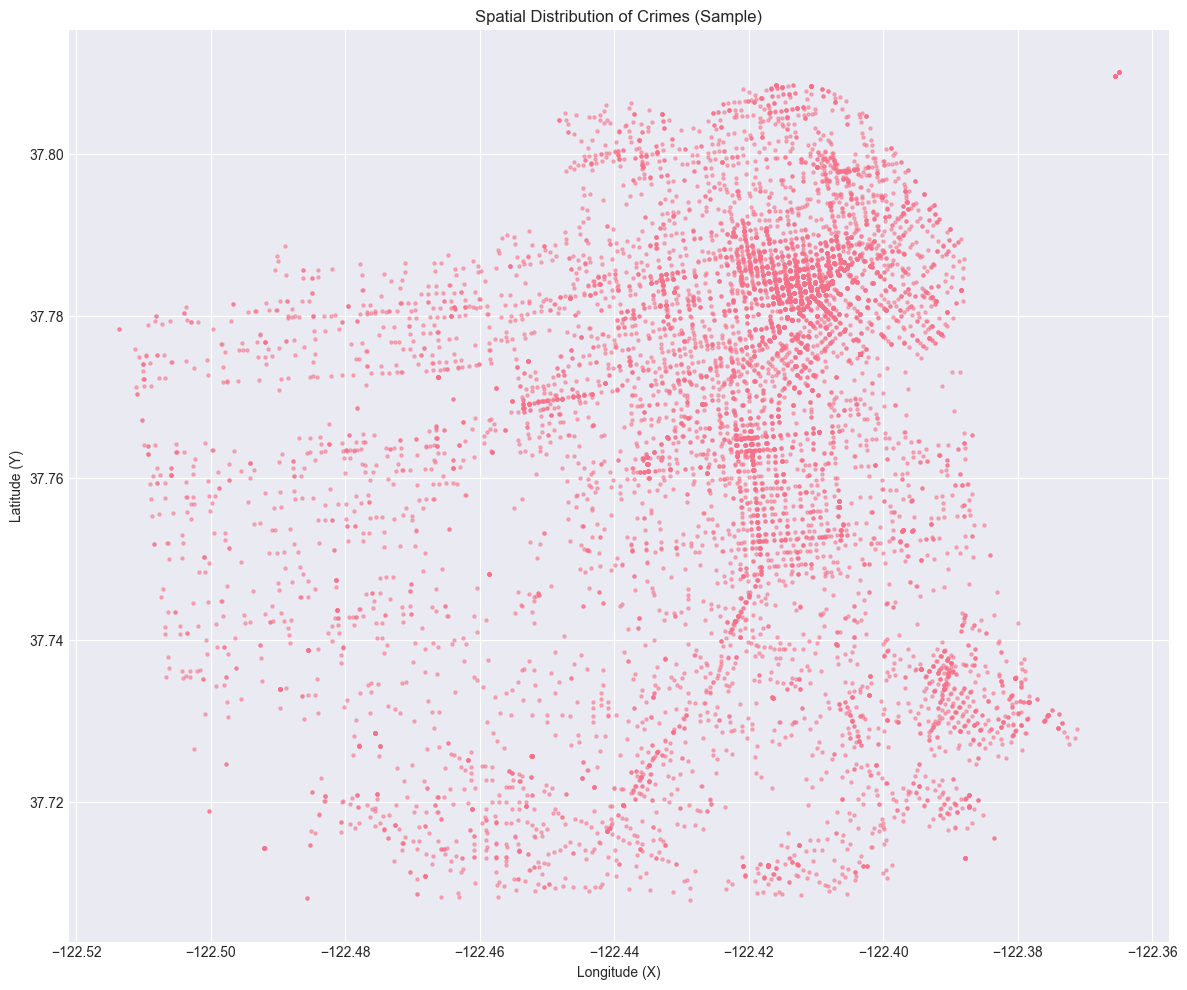

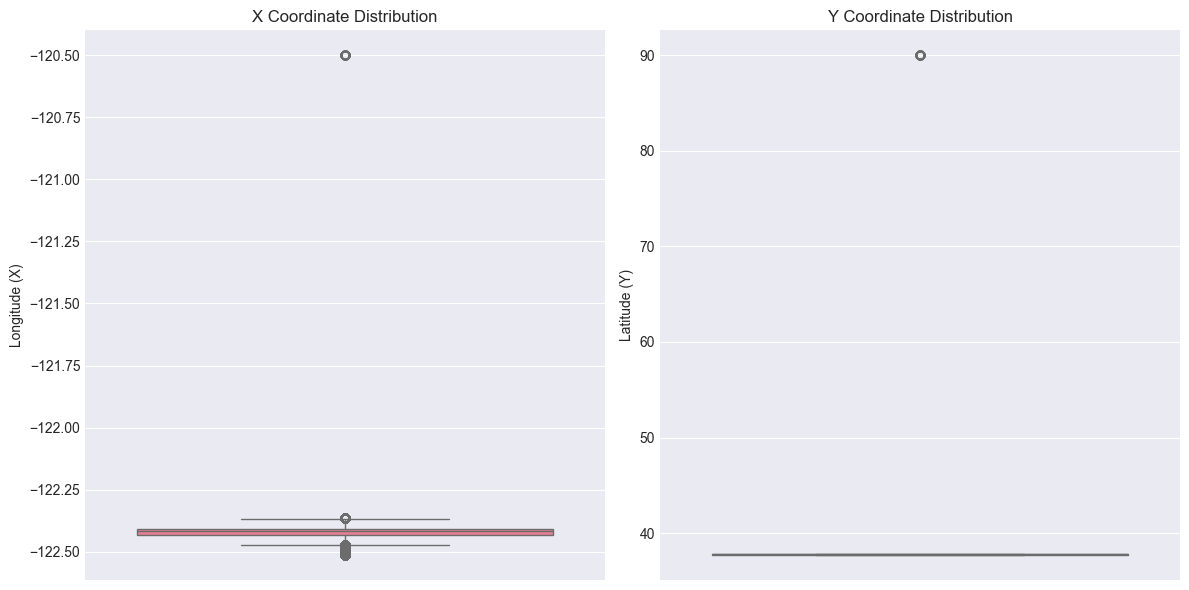


Cleaning coordinate data...
Removed 1692 records with coordinates outside SF bounds
Remaining records: 874034


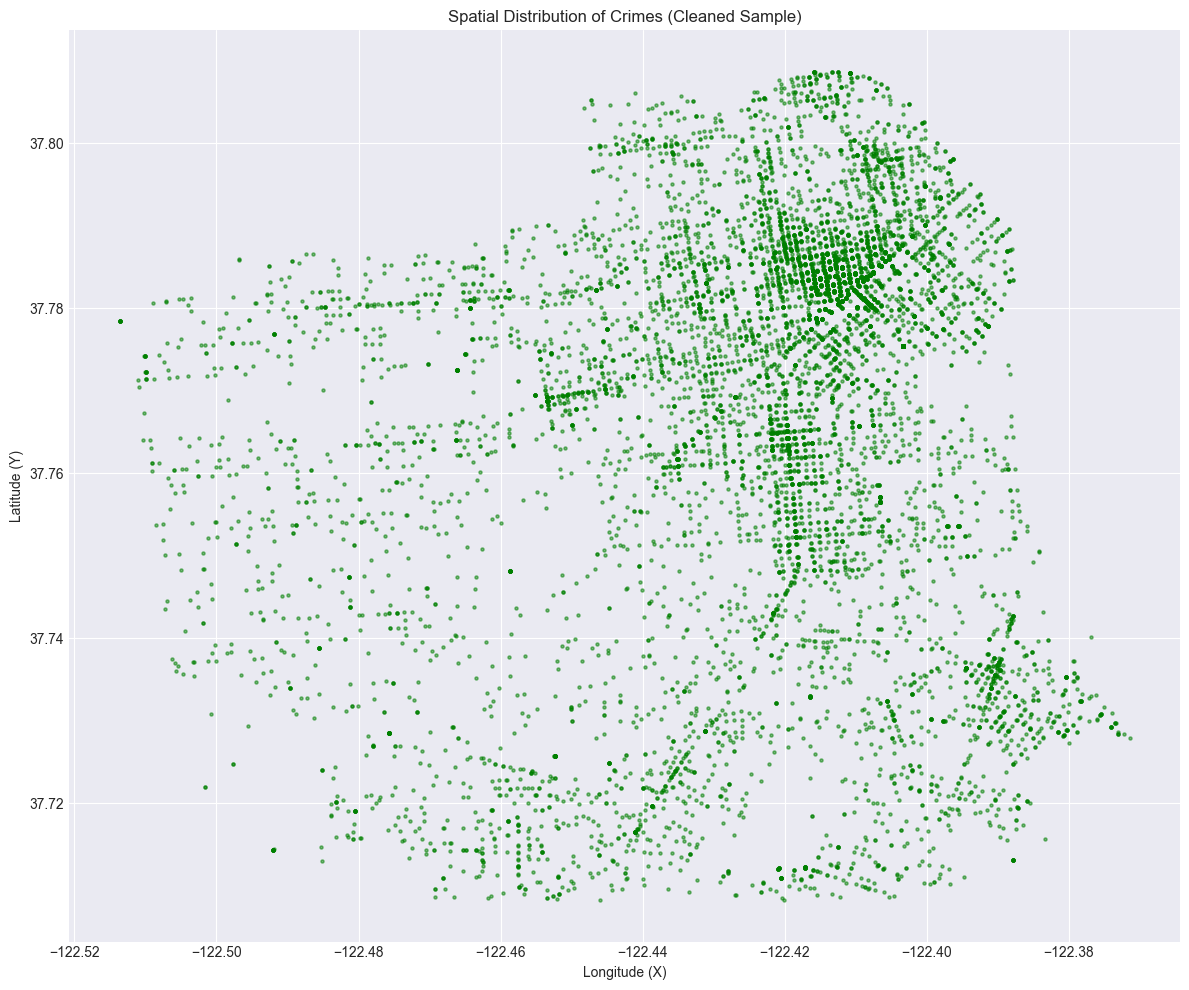

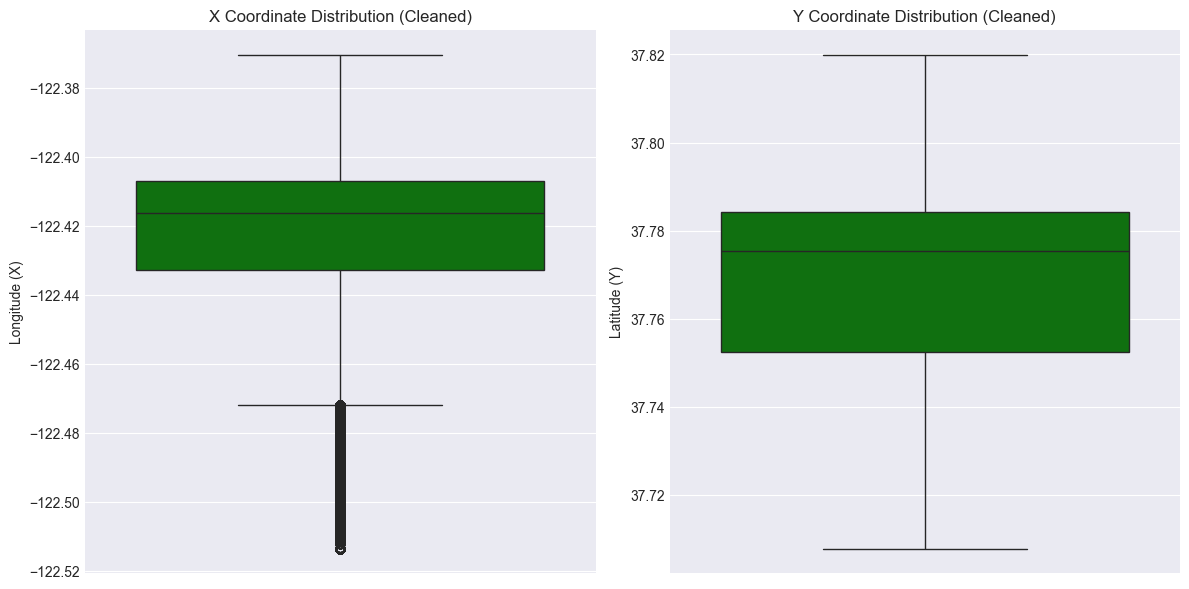

In [18]:
import os

print("\n5. SPATIAL DATA ANALYSIS")
print("-" * 50)

if 'X' in df.columns and 'Y' in df.columns:
    print("\nChecking for coordinate outliers...")

    # Statistical summary of coordinates
    print("\nCoordinate statistics:")
    print(df[['X', 'Y']].describe())

    # Identify potential outliers using IQR
    Q1_X = df['X'].quantile(0.25)
    Q3_X = df['X'].quantile(0.75)
    IQR_X = Q3_X - Q1_X

    Q1_Y = df['Y'].quantile(0.25)
    Q3_Y = df['Y'].quantile(0.75)
    IQR_Y = Q3_Y - Q1_Y

    # Define outlier bounds
    lower_bound_X = Q1_X - 1.5 * IQR_X
    upper_bound_X = Q3_X + 1.5 * IQR_X
    lower_bound_Y = Q1_Y - 1.5 * IQR_Y
    upper_bound_Y = Q3_Y + 1.5 * IQR_Y

    # Count outliers
    outliers_X = ((df['X'] < lower_bound_X) | (df['X'] > upper_bound_X)).sum()
    outliers_Y = ((df['Y'] < lower_bound_Y) | (df['Y'] > upper_bound_Y)).sum()

    print(f"X coordinate outliers: {outliers_X} ({outliers_X/len(df)*100:.2f}%)")
    print(f"Y coordinate outliers: {outliers_Y} ({outliers_Y/len(df)*100:.2f}%)")

    # Plot coordinates scatter plot (with a sample to avoid overcrowding)
    plt.figure(figsize=(12, 10))
    sample_size = min(10000, len(df))
    sample_df = df.sample(sample_size, random_state=42)
    plt.scatter(sample_df['X'], sample_df['Y'], alpha=0.5, s=5)
    plt.title('Spatial Distribution of Crimes (Sample)')
    plt.xlabel('Longitude (X)')
    plt.ylabel('Latitude (Y)')
    plt.tight_layout()
    plt.savefig(os.path.join("visualization", "crime_spatial_distribution.png"))
    plt.show()
    plt.close()

    # Create box plots
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['X'])
    plt.title('X Coordinate Distribution')
    plt.ylabel('Longitude (X)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Y'])
    plt.title('Y Coordinate Distribution')
    plt.ylabel('Latitude (Y)')

    plt.tight_layout()
    plt.savefig(os.path.join("visualization", "coordinates_boxplot.png"))
    plt.show()
    plt.close()

    print("\nCleaning coordinate data...")
    # Create cleaned copy using SF bounds
    df_cleaned = df[
        (df['Y'].between(SF_LAT_MIN, SF_LAT_MAX)) & 
        (df['X'].between(SF_LON_MIN, SF_LON_MAX))
    ].copy()

    removed_count = len(df) - len(df_cleaned)
    print(f"Removed {removed_count} records with coordinates outside SF bounds")
    print(f"Remaining records: {len(df_cleaned)}")

    # Replot scatter plot after cleaning
    plt.figure(figsize=(12, 10))
    sample_size = min(10000, len(df_cleaned))
    sample_df = df_cleaned.sample(sample_size, random_state=42)
    plt.scatter(sample_df['X'], sample_df['Y'], alpha=0.5, s=5, color='green')
    plt.title('Spatial Distribution of Crimes (Cleaned Sample)')
    plt.xlabel('Longitude (X)')
    plt.ylabel('Latitude (Y)')
    plt.tight_layout()
    plt.savefig(os.path.join("visualization", "crime_spatial_distribution_cleaned.png"))
    plt.show()
    plt.close()

    # Replot box plots after cleaning
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_cleaned['X'], color='green')
    plt.title('X Coordinate Distribution (Cleaned)')
    plt.ylabel('Longitude (X)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned['Y'], color='green')
    plt.title('Y Coordinate Distribution (Cleaned)')
    plt.ylabel('Latitude (Y)')

    plt.tight_layout()
    plt.savefig(os.path.join("visualization", "coordinates_boxplot_cleaned.png"))
    plt.show()
    plt.close()


## 6. Data Cleaning Process

In [19]:
print("\n6. DATA CLEANING PROCESS")
print("-" * 50)

# Create a copy for cleaned data
df_cleaned = df.copy()

# 6.1 Handle missing values
print("\nHandling missing values...")
for col in df_cleaned.columns:
    missing_count = df_cleaned[col].isnull().sum()
    if missing_count > 0:
        print(f"Handling {missing_count} missing values in {col}")
        
        if df_cleaned[col].dtype in ['float64', 'int64']:
            # For numerical columns, fill with median
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"  - Filled with median: {median_val}")
        else:
            # For categorical columns, fill with mode
            mode_val = df_cleaned[col].mode()[0]
            df_cleaned[col].fillna(mode_val, inplace=True)
            print(f"  - Filled with mode: {mode_val}")


6. DATA CLEANING PROCESS
--------------------------------------------------

Handling missing values...


In [ ]:
import os
import folium
from folium.plugins import HeatMap

# Verify coordinates are cleaned properly
if 'X' in df_cleaned.columns and 'Y' in df_cleaned.columns:
    print("\nVerifying coordinate cleaning...")

    invalid_coords = df_cleaned[
        (~df_cleaned['Y'].between(SF_LAT_MIN, SF_LAT_MAX)) |
        (~df_cleaned['X'].between(SF_LON_MIN, SF_LON_MAX))
    ]

    if len(invalid_coords) > 0:
        print(f"⚠️ Warning: Found {len(invalid_coords)} records still outside SF bounds")
        print("These records will be removed now")
        df_cleaned = df_cleaned[
            (df_cleaned['Y'].between(SF_LAT_MIN, SF_LAT_MAX)) &
            (df_cleaned['X'].between(SF_LON_MIN, SF_LON_MAX))
        ].copy()
    else:
        print("✅ All coordinates verified to be within San Francisco bounds")

# --- Create Heatmap ---
if 'X' in df_cleaned.columns and 'Y' in df_cleaned.columns:
    print("\nCreating crime heatmap...")

    sample_size = min(50000, len(df_cleaned))
    sample_for_heat = df_cleaned.sample(sample_size, random_state=42)

    sf_map = folium.Map(
        location=[df_cleaned['Y'].mean(), df_cleaned['X'].mean()],
        zoom_start=12,
        tiles='CartoDB positron'
    )

    heat_data = [[row['Y'], row['X']] for _, row in sample_for_heat.iterrows()]
    HeatMap(heat_data, radius=15).add_to(sf_map)

    # Save heatmap
    heatmap_path = os.path.join("visualization", "sf_crime_heatmap.html")
    sf_map.save(heatmap_path)
    print(f"🗺️ Crime heatmap created and saved to: {heatmap_path}")

# --- Save Cleaned Data ---
cleaned_data_path = os.path.join("data", "sf_crime_cleaned.csv")
df_cleaned.to_csv(cleaned_data_path, index=False)

print("\n✅ Final dataset statistics:")
print(df_cleaned.describe())

print("\n🎉 Data cleaning and visualization complete!")
print("Generated files:")
print(f"- {cleaned_data_path}")
print(f"- {os.path.join('visualization', 'crime_spatial_distribution.png')}")
print(f"- {os.path.join('visualization', 'coordinates_boxplot.png')}")
print(f"- {os.path.join('visualization', 'crime_spatial_distribution_cleaned.png')}")
print(f"- {os.path.join('visualization', 'coordinates_boxplot_cleaned.png')}")
print(f"- {heatmap_path}")



Verifying coordinate cleaning...
⚠️ Warning: Found 1692 records still outside SF bounds
These records will be removed now

Creating crime heatmap...
🗺️ Crime heatmap created and saved to: visualization\sf_crime_heatmap.html

✅ Final dataset statistics:
              X         Y      Year     Month       Day      Hour
count 874034.00 874034.00 874034.00 874034.00 874034.00 874034.00
mean    -122.42     37.77   2008.71      6.44     15.57     13.41
std        0.03      0.02      3.63      3.43      8.78      6.55
min     -122.51     37.71   2003.00      1.00      1.00      0.00
25%     -122.43     37.75   2006.00      3.00      8.00      9.00
50%     -122.42     37.78   2009.00      6.00     16.00     14.00
75%     -122.41     37.78   2012.00      9.00     23.00     19.00
max     -122.37     37.82   2015.00     12.00     31.00     23.00

🎉 Data cleaning and visualization complete!
Generated files:
- data\sf_crime_cleaned.csv
- visualization\crime_spatial_distribution.png
- visualization


7. CREATING SUMMARY DASHBOARD
--------------------------------------------------


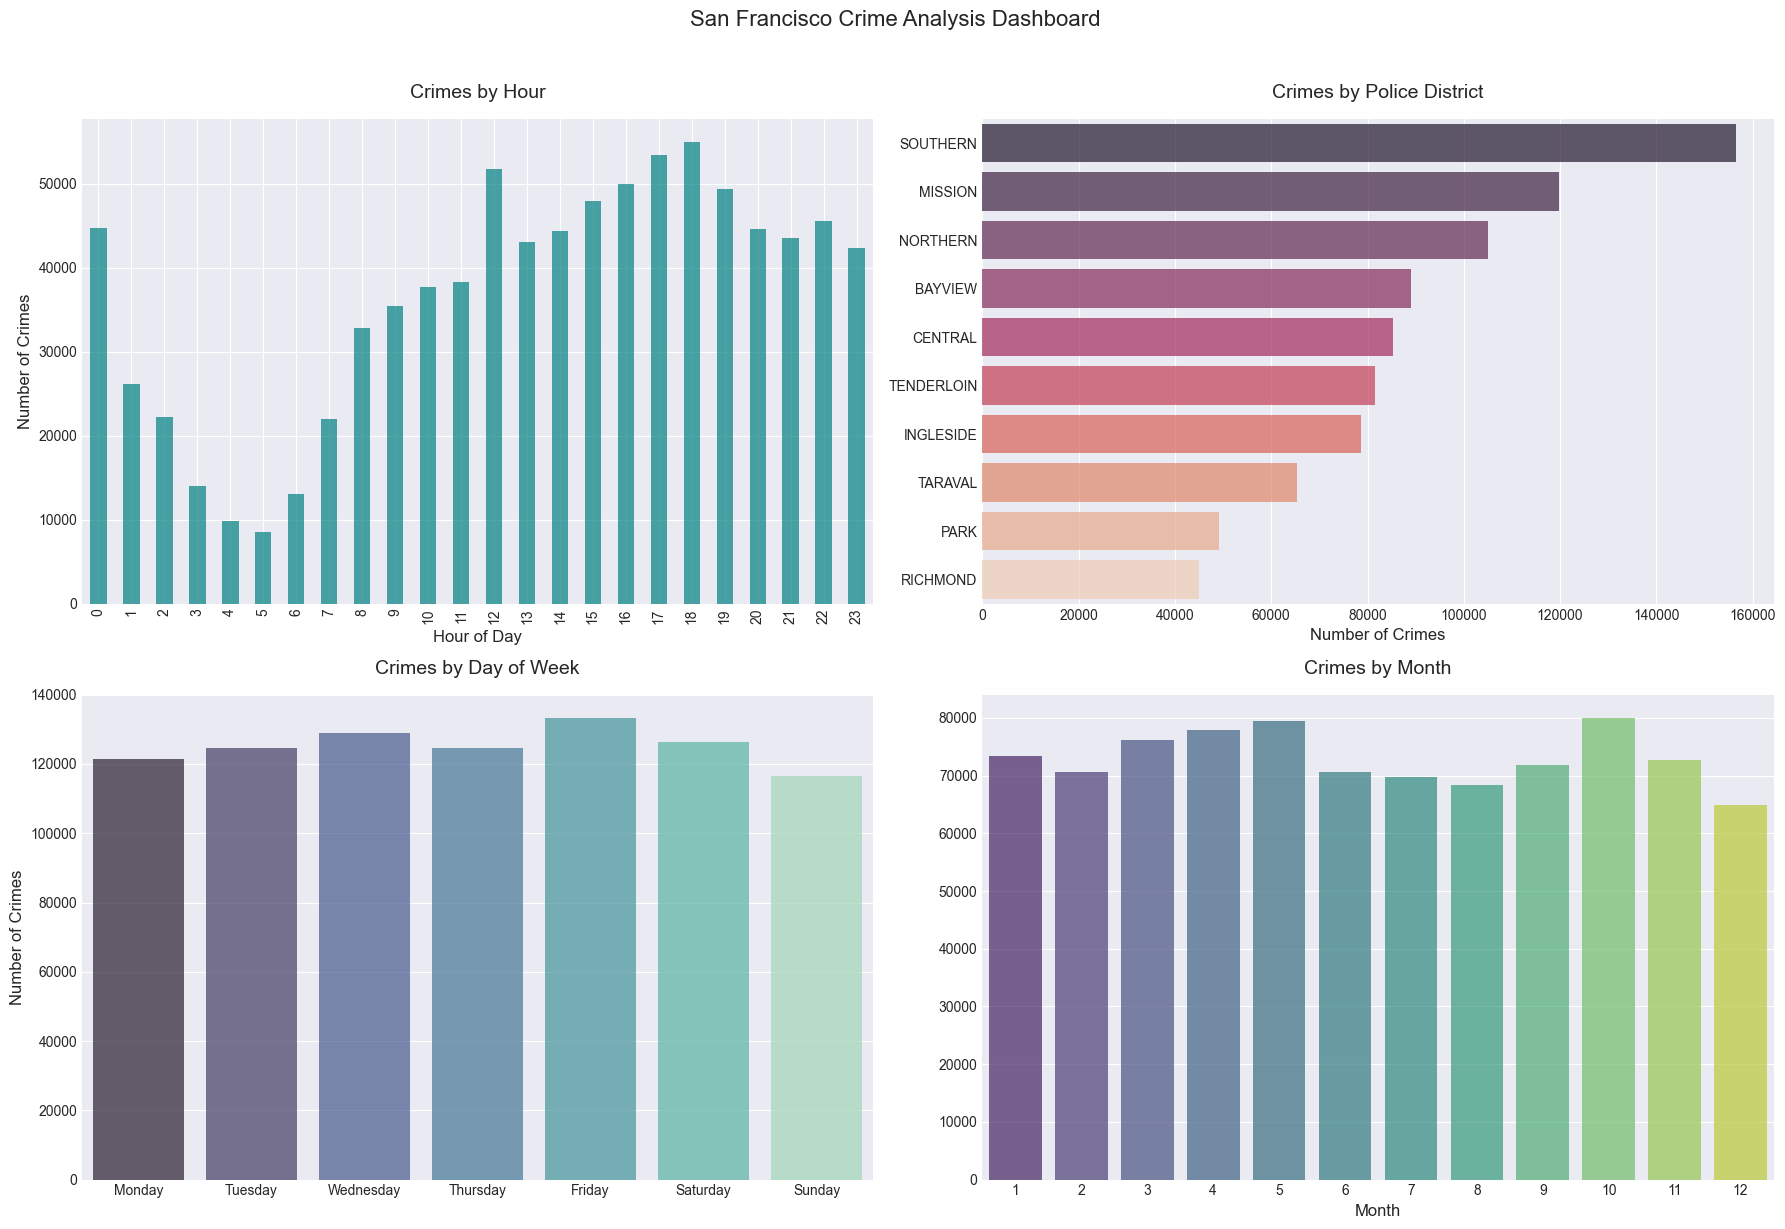

Saved dashboard to ../visualization/sf_crime_dashboard.png


In [23]:
# ==============================================
# 7. FINAL DASHBOARD VISUALIZATION 
# ==============================================
import os
print("\n7. CREATING SUMMARY DASHBOARD")
print("-" * 50)

# Create a dashboard figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Hourly plot
hour_plot = df['Hour'].value_counts().sort_index()
hour_plot.plot(kind='bar', ax=axes[0,0], color='teal', alpha=0.7)
axes[0,0].set_title('Crimes by Hour', fontsize=14, pad=15)
axes[0,0].set_xlabel('Hour of Day', fontsize=12)
axes[0,0].set_ylabel('Number of Crimes', fontsize=12)

# District plot
sns.countplot(y='PdDistrict', data=df, ax=axes[0,1], 
             order=df['PdDistrict'].value_counts().index,
             palette='rocket', alpha=0.7)
axes[0,1].set_title('Crimes by Police District', fontsize=14, pad=15)
axes[0,1].set_xlabel('Number of Crimes', fontsize=12)
axes[0,1].set_ylabel('')

# Day of week plot
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='DayOfWeek', data=df, ax=axes[1,0],
             order=day_order,
             palette='mako', alpha=0.7)
axes[1,0].set_title('Crimes by Day of Week', fontsize=14, pad=15)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Number of Crimes', fontsize=12)

# Month plot
month_order = range(1,13)
sns.countplot(x='Month', data=df, ax=axes[1,1], 
             palette='viridis', alpha=0.7,
             order=month_order)
axes[1,1].set_title('Crimes by Month', fontsize=14, pad=15)
axes[1,1].set_xlabel('Month', fontsize=12)
axes[1,1].set_ylabel('')

# Final adjustments
plt.suptitle('San Francisco Crime Analysis Dashboard', y=1.02, fontsize=16)
plt.tight_layout()
f_path = os.path.join("visualization","sf_crime_dashboard.png")
# Save high-quality version
plt.savefig(f_path, 
           dpi=300, 
           bbox_inches='tight',
           facecolor='white')
plt.show()
plt.close()

print("Saved dashboard to ../visualization/sf_crime_dashboard.png")

In [24]:
print("\nCreating interactive spatial map...")
sf_map = folium.Map(
    location=[37.77, -122.42],
    zoom_start=12,
    tiles='CartoDB positron',
    control_scale=True
)

mc = MarkerCluster().add_to(sf_map)

for _, row in df_cleaned.sample(5000).iterrows():
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=2,
        color='#3186cc',
        fill=True,
        fill_opacity=0.6
    ).add_to(mc)




Creating interactive spatial map...
